### Dataset Preprocessing: Concatenation

In [1]:
import pandas as pd
import numpy as np

In [92]:
clim = pd.read_csv('Climate_twitter.csv')
bt = pd.read_csv('twitter_sentiment_data.csv')
json = pd.read_json('train.jsonl', lines=True)

In [93]:
clim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            396 non-null    int64  
 1   date          396 non-null    object 
 2   retweets      396 non-null    int64  
 3   source        396 non-null    object 
 4   author        396 non-null    object 
 5   likes         396 non-null    int64  
 6   text          396 non-null    object 
 7   twitter_name  396 non-null    object 
 8   location      293 non-null    object 
 9   verified      396 non-null    bool   
 10  followers     396 non-null    int64  
 11  friends       396 non-null    int64  
 12  polarity      396 non-null    float64
 13  subjectivity  396 non-null    float64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 40.7+ KB


In [95]:
# adding label based on polarity score
conditions = [
    (clim['polarity'] < 0),
    (clim['polarity'] > 0),
    (clim['polarity'] == 0)]

values = [0,1, 'neutral']

clim['label'] = np.select(conditions, values)

clim.head()

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity,label
0,2184934963,2020-12-22 23:22:20,71,Twitter Web App,GO GREEN,91,The death of summer Arctic ice our Earth coole...,ECOWARRIORSS,NaN,False,23415,20439,-0.054365,0.426984,0
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,Elsevier and the EditorsinChief are pleased to...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333,1
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238,1
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,neutral
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH cli...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,neutral


In [96]:
# dropping neutral entries
clim = clim.drop(clim[clim['label'] == 'neutral'].index)

In [97]:
clim['label'].value_counts()

label
1    190
0     80
Name: count, dtype: int64

In [98]:
# dropping all columns except text and label
clim = clim.drop(columns = ['id','date','source','author','twitter_name','location','verified','retweets','likes','followers','friends','polarity','subjectivity'])

In [100]:
clim.info()
clim['text'] = clim['text'].astype('string')
clim['label'] = clim['label'].astype('int64')
clim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 0 to 395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    270 non-null    string
 1   label   270 non-null    object
dtypes: object(1), string(1)
memory usage: 6.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 0 to 395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    270 non-null    string
 1   label   270 non-null    int64 
dtypes: int64(1), string(1)
memory usage: 6.3 KB


In [101]:
bt.head()
bt = bt.drop(columns=['tweetid'])

In [102]:
bt.rename(columns={'sentiment': "label", 'message':'text'}, inplace=True)

In [103]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   43943 non-null  int64 
 1   text    43943 non-null  object
dtypes: int64(1), object(1)
memory usage: 686.7+ KB


In [104]:
bt = bt.drop(bt[bt['label'] ==  2].index)

In [105]:
bt = bt.drop(bt[bt['label'] == 0].index)

In [106]:
bt.dropna(subset=['label'], inplace=True)

In [107]:
conditions = [
    (bt['label'] == -1),
    (bt['label'] == 1)]

values = [0,1]

bt['sent'] = np.select(conditions, values)

In [108]:
bt['label'] = bt['sent']
bt=bt.drop(columns=['sent'])

In [109]:
bt['text'] = bt['text'].astype("string")
bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26952 entries, 0 to 43942
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   26952 non-null  int64 
 1   text    26952 non-null  string
dtypes: int64(1), string(1)
memory usage: 631.7 KB


In [110]:
bt['label'].value_counts()

label
1    22962
0     3990
Name: count, dtype: int64

In [111]:
json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2117 non-null   object
 1   label   2117 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.2+ KB


In [112]:
json['label'].value_counts()

label
0    1585
1     532
Name: count, dtype: int64

In [120]:
df_list = [clim, bt, json] 
df = pd.concat(df_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29339 entries, 0 to 2116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    29339 non-null  object
 1   label   29339 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 687.6+ KB


In [121]:
df['text'] = df['text'].astype('string')

In [122]:
df['label'].value_counts()

label
1    23684
0     5655
Name: count, dtype: int64

### Dataset Preprocessing: Filteration

In [123]:
import nltk 

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tessanderson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [124]:
nltk.download('punkt')  # Download the punkt tokenizer if not already downloaded

df['tokens'] = df['text'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tessanderson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [125]:
keywords = ["sustainability", "environmental", "conservation", "recycling", "sustainable",
                         "responsibility", "green", "eco-friendly", "renewable", "carbon", "climate", "ecosystem",
                         "planet", "biodiversity", "energy", "water", "pollution", "reduction", "renewability", 
                         "ecological", "renewable", "greenhouse", "clean", "solar", "wind", "earth", "sustainable", 
                         "planet", "ecology", "ocean", "forest", "organic", "earth-friendly", "bio", "ethics", 
                         "conservationist", "sustain", "renew", "ethical", "greenery", "saver", "sustainable", 
                         "conservator", "recycler", "biodegradable", "natural", "greenery", "environment", 
                         "saver", "earth-saving", "sustainability", "green-living", "clean", "responsible", 
                         "preservation", "regeneration", "ecosystem", "safeguarding"]
filtered_df = df[df['tokens'].apply(lambda tokens: any(keyword in tokens for keyword in keywords))]

### Analysis: Traditional ML Pipeline

In [128]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = filtered_df.text.values
y = filtered_df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [53]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [129]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
Dataset_acc_list = []
Dataset_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Dataset_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    Dataset_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    Dataset_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    Dataset_cm_list.append(confusion_matrix(y_test, y_pred))

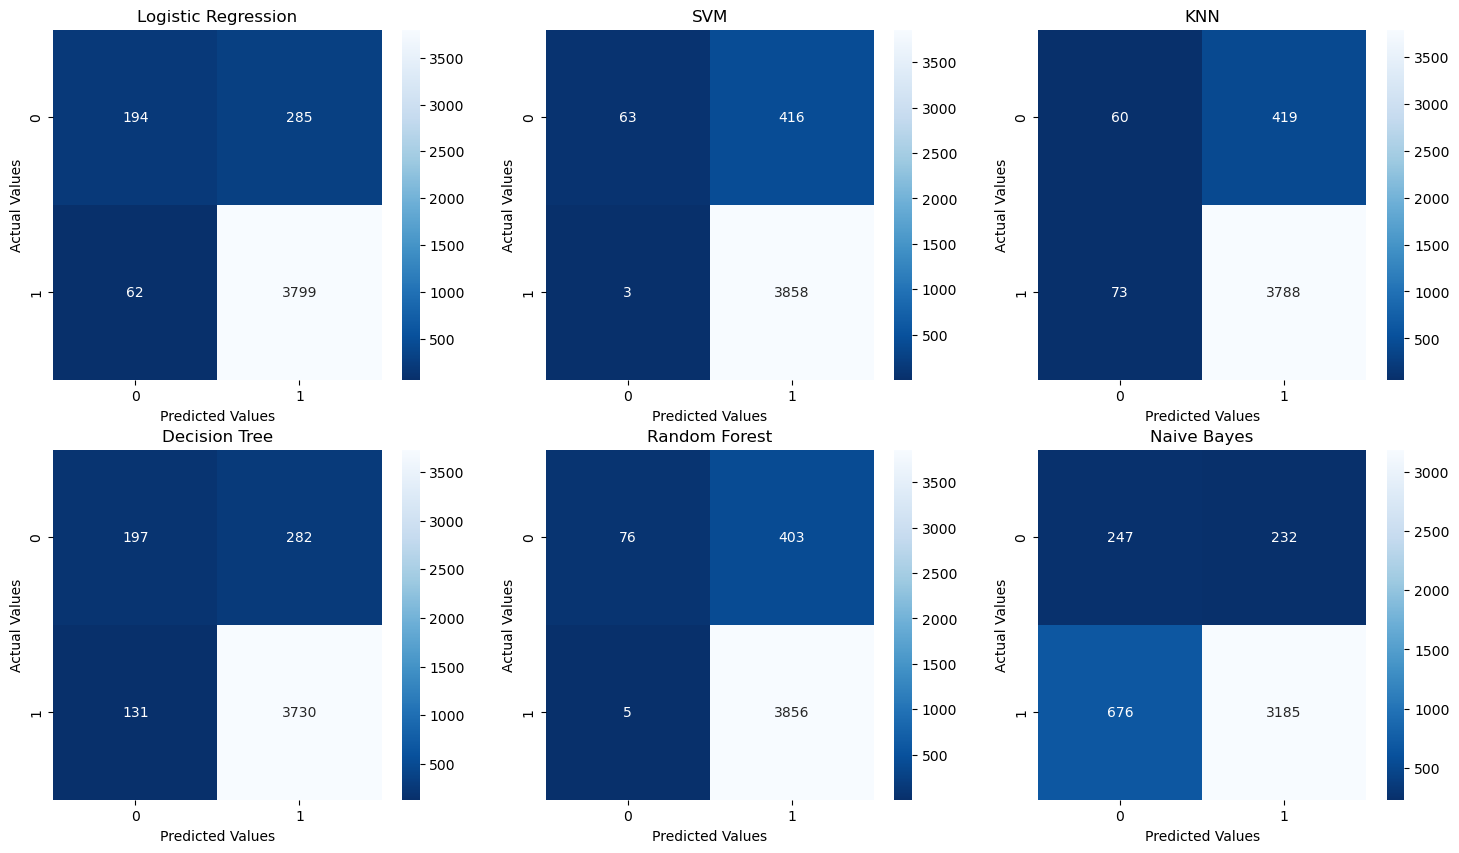

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(Dataset_cm_list)):
    cm = Dataset_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [57]:
data_labels_results = pd.DataFrame({'Model':model_list, 'Accuracy':Dataset_acc_list})
data_labels_results 

,Model,Accuracy
0,Logistic Regression,0.920046
1,SVM,0.903456
2,KNN,0.886636
3,Decision Tree,0.908295
4,Random Forest,0.905069
5,Naive Bayes,0.790783


### Analysis: Pre-Trained Models
##### Adding Prediction Columns to Filtered Dataframe

In [131]:
from textblob import TextBlob
import flair
from flair.models import TextClassifier
from flair.data import Sentence
from segtok.segmenter import split_single
import re

In [132]:
def format_output(output_dict):
    sentiment=False
    if(output_dict['compound']>0):
        sentiment=1
    else:
        sentiment=0
    return sentiment
def predict_sentiment(text):
    output_dict = sent_analyzer.polarity_scores(text)
    return format_output(output_dict)

# running the predictions
filtered_df['vader_prediction']=filtered_df['text'].apply(predict_sentiment)

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_19841/3179011084.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['vader_prediction']=filtered_df['text'].apply(predict_sentiment)


In [133]:
def sentiment_analysis(text):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 text['TextBlob_Subjectivity'] = text['text'].apply(getSubjectivity)
 text ['TextBlob_Polarity'] = text['text'].apply(getPolarity)
 def getAnalysis(score):
  if score > 0:
    return 1
  else:
    return 0
 text ['TextBlob_Analysis'] = text  ['TextBlob_Polarity'].apply(getAnalysis )
 return text

filtered_df = sentiment_analysis(filtered_df)

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_19841/306428860.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['TextBlob_Subjectivity'] = text['text'].apply(getSubjectivity)
/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_19841/306428860.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text ['TextBlob_Polarity'] = text['text'].apply(getPolarity)
/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_19841/306428860.py:17: SettingWithCopyWarning: 
A value is trying to

In [134]:
sia = TextClassifier.load('en-sentiment')

In [138]:
def sentiment_Flair(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return 1
    else:
        return 0

filtered_df['Flair_Sentiment'] = filtered_df['text'].apply(lambda x: sentiment_Flair(x))

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_19841/965764662.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Flair_Sentiment'] = filtered_df['text'].apply(lambda x: sentiment_Flair(x))


### Comparing Labels Generated by Pre-Trained Models to True Dataset Labels


In [135]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(filtered_df['label'],filtered_df['vader_prediction'])

print("Accuracy: {}\n".format(accuracy))

print(classification_report(filtered_df['label'],filtered_df['vader_prediction']))

Accuracy: 0.3713996036683718

              precision    recall  f1-score   support

           0       0.10      0.61      0.18      2412
           1       0.87      0.34      0.49     19287

    accuracy                           0.37     21699
   macro avg       0.49      0.47      0.33     21699
weighted avg       0.79      0.37      0.46     21699



In [136]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(filtered_df['label'],filtered_df['TextBlob_Analysis'])

print("Accuracy: {}\n".format(accuracy))

print(classification_report(filtered_df['label'],filtered_df['TextBlob_Analysis']))

Accuracy: 0.4067468546937647

              precision    recall  f1-score   support

           0       0.11      0.64      0.19      2412
           1       0.89      0.38      0.53     19287

    accuracy                           0.41     21699
   macro avg       0.50      0.51      0.36     21699
weighted avg       0.81      0.41      0.49     21699



In [139]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(filtered_df['label'],filtered_df['Flair_Sentiment'])

print("Accuracy: {}\n".format(accuracy))

print(classification_report(filtered_df['label'],filtered_df['Flair_Sentiment']))

Accuracy: 0.427485137563943

              precision    recall  f1-score   support

           0       0.13      0.69      0.21      2412
           1       0.91      0.39      0.55     19287

    accuracy                           0.43     21699
   macro avg       0.52      0.54      0.38     21699
weighted avg       0.82      0.43      0.51     21699



### ML Models Trained on Labels Determined by Pre-Trained Models

In [140]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.vader_prediction.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [141]:
Vader_acc_list = []
Vader_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Vader_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    Vader_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    Vader_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    Vader_cm_list.append(confusion_matrix(y_test, y_pred))

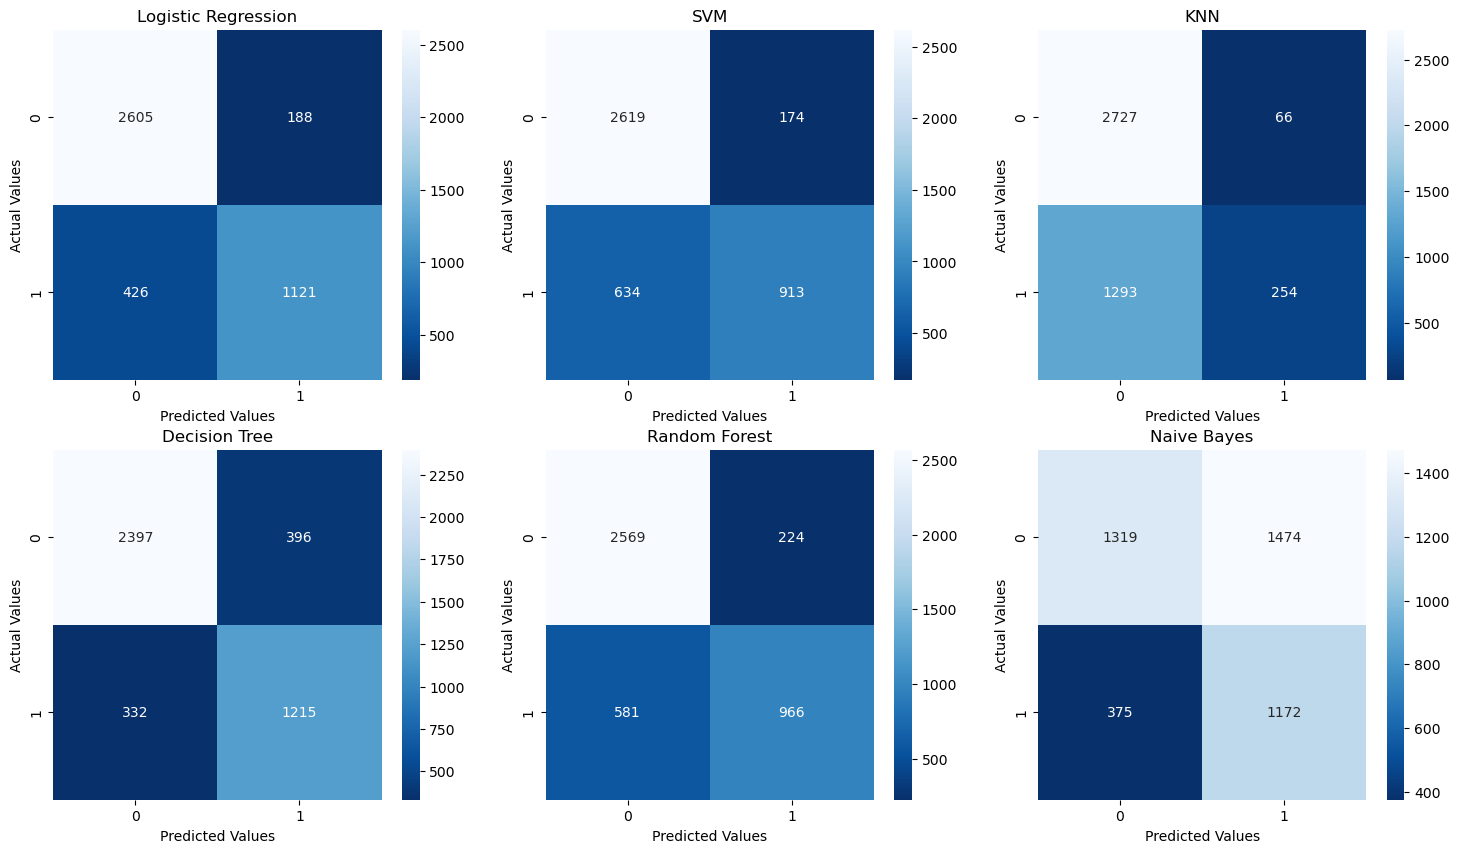

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(Vader_cm_list)):
    cm = Vader_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [146]:
VaderML_results = pd.DataFrame({'Model':model_list, 'Accuracy':Vader_acc_list})
VaderML_results

,Model,Accuracy
0,Logistic Regression,0.858525
1,SVM,0.813825
2,KNN,0.686866
3,Decision Tree,0.832258
4,Random Forest,0.814516
5,Naive Bayes,0.573963


In [147]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.TextBlob_Analysis.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [148]:
tb_acc_list = []
tb_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tb_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    tb_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    tb_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    tb_cm_list.append(confusion_matrix(y_test, y_pred))

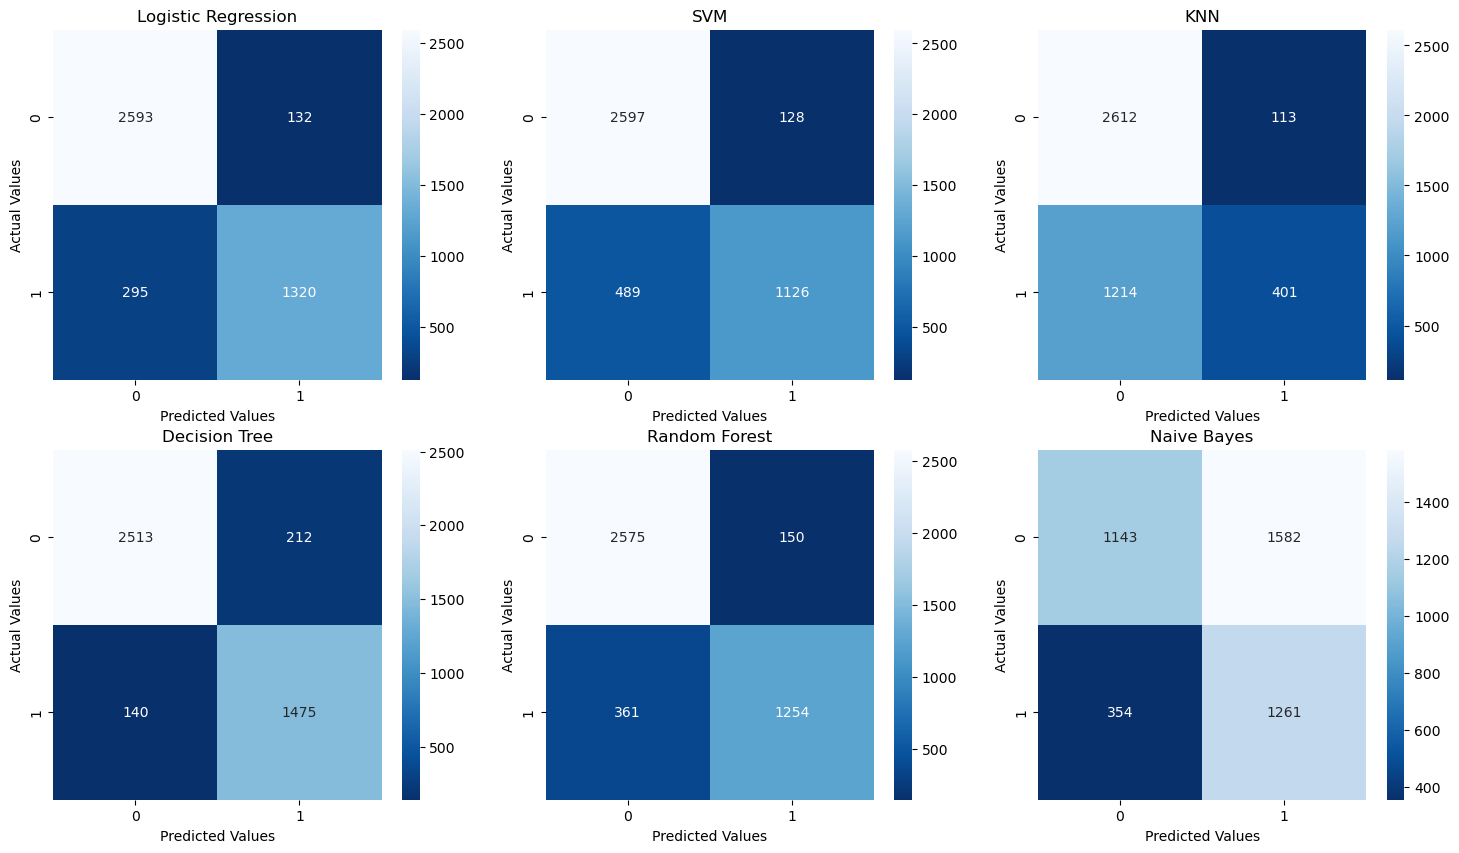

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(tb_cm_list)):
    cm = tb_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [150]:
TBML_results = pd.DataFrame({'Model':model_list, 'Accuracy':tb_acc_list})
TBML_results

,Model,Accuracy
0,Logistic Regression,0.901613
1,SVM,0.857834
2,KNN,0.694240
3,Decision Tree,0.918894
4,Random Forest,0.882258
5,Naive Bayes,0.553917


In [151]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.Flair_Sentiment.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [152]:
f_acc_list = []
f_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    f_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    f_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    f_cm_list.append(confusion_matrix(y_test, y_pred))

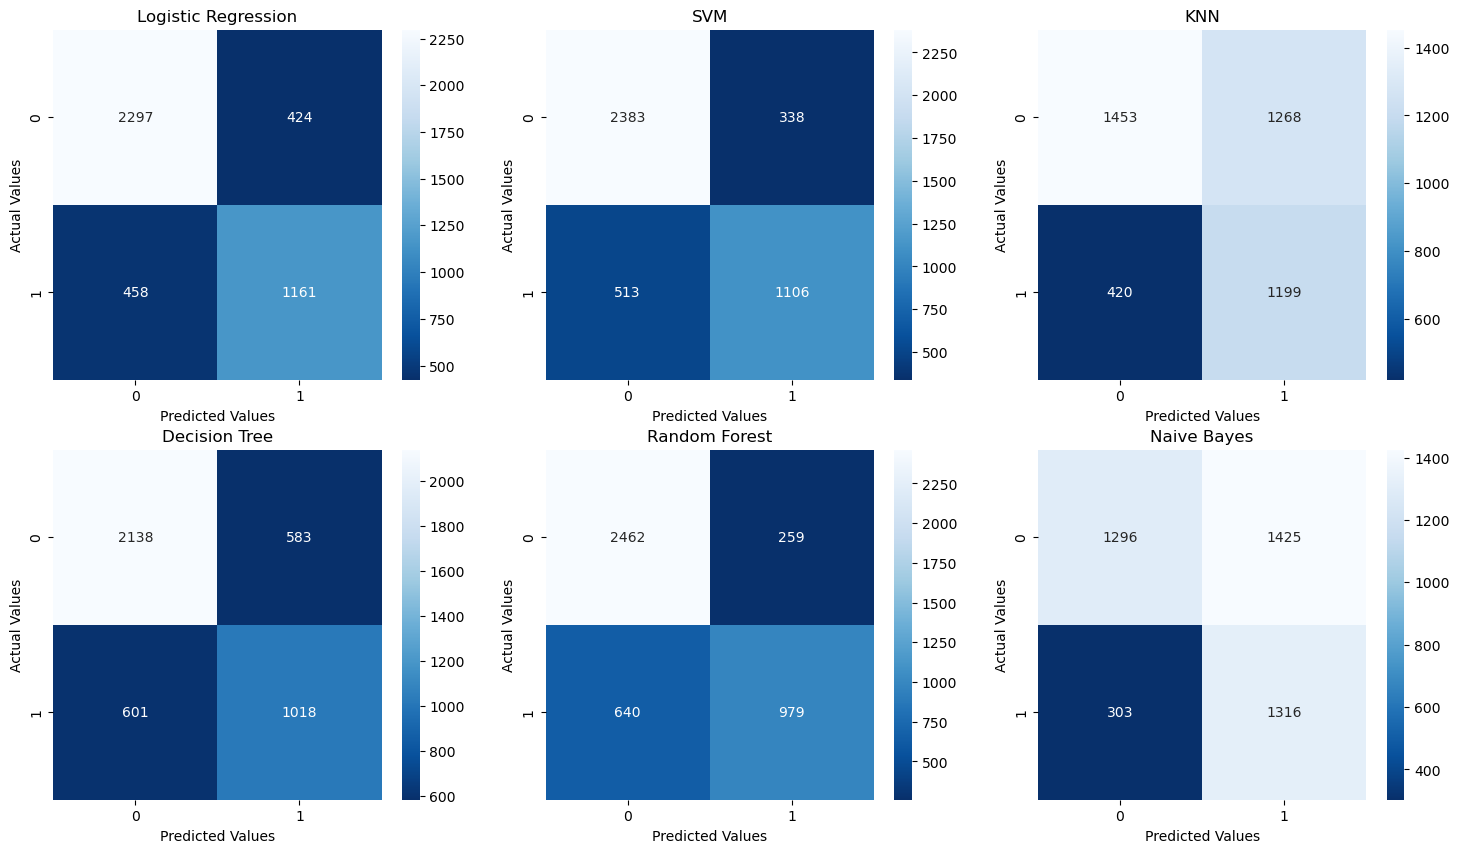

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(f_cm_list)):
    cm = f_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [154]:
FlairML_results = pd.DataFrame({'Model':model_list, 'Accuracy':f_acc_list})
FlairML_results

,Model,Accuracy
0,Logistic Regression,0.796774
1,SVM,0.803917
2,KNN,0.611060
3,Decision Tree,0.727189
4,Random Forest,0.792857
5,Naive Bayes,0.601843


In [155]:
all_results = pd.DataFrame({'Model':model_list, 'Dataset Labels Accuracy': Dataset_acc_list, 'VADER Accuracy': Vader_acc_list, 'TextBlob Accuracy': tb_acc_list, 'Flair Accuracy': f_acc_list})
all_results

,Model,Dataset Labels Accuracy,VADER Accuracy,TextBlob Accuracy,Flair Accuracy
0,Logistic Regression,0.920046,0.858525,0.901613,0.796774
1,SVM,0.903456,0.813825,0.857834,0.803917
2,KNN,0.886636,0.686866,0.694240,0.611060
3,Decision Tree,0.904839,0.832258,0.918894,0.727189
4,Random Forest,0.905991,0.814516,0.882258,0.792857
5,Naive Bayes,0.790783,0.573963,0.553917,0.601843
